<a href="https://colab.research.google.com/github/JahaanThakkar/Computational-Physics-Assignments/blob/main/Assgn4_Jahaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import time
import emcee
import corner
from scipy.optimize import minimize
import scipy

# Problem 1

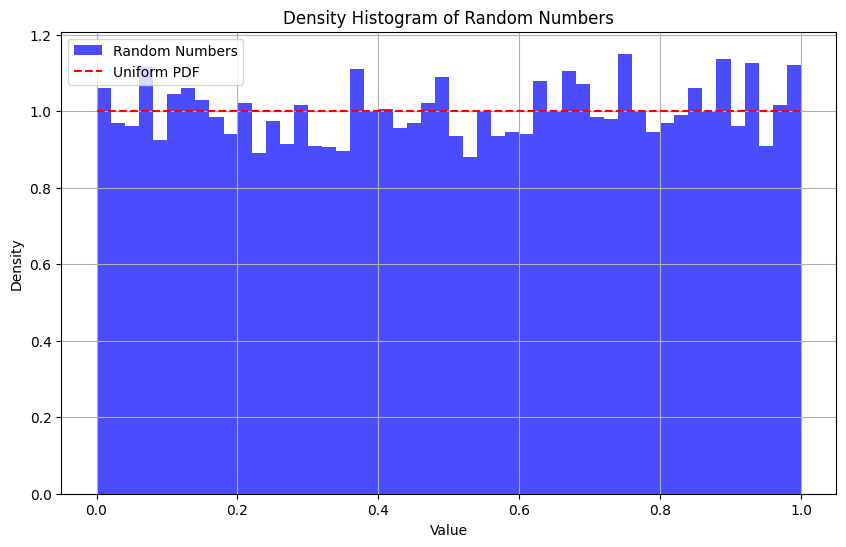

In [21]:
class LCRNG:
    def __init__(self, seed, a=1664525, c=1013904223, m=2**32):
        self.seed = seed
        self.a = a
        self.c = c
        self.m = m

    def next(self):
        self.seed = (self.a * self.seed + self.c) % self.m
        return self.seed / self.m

# Generating 10,000 random numbers
random_generator = LCRNG(seed=42)
random_numbers = [random_generator.next() for _ in range(10000)]

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(random_numbers, bins=50, density=True, alpha=0.7, color='blue', label='Random Numbers')

# Plotting uniform PDF
x = np.linspace(0, 1, 1000)
plt.plot(x, np.ones_like(x), color='red', linestyle='--', label='Uniform PDF')

plt.title('Density Histogram of Random Numbers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Problem 2

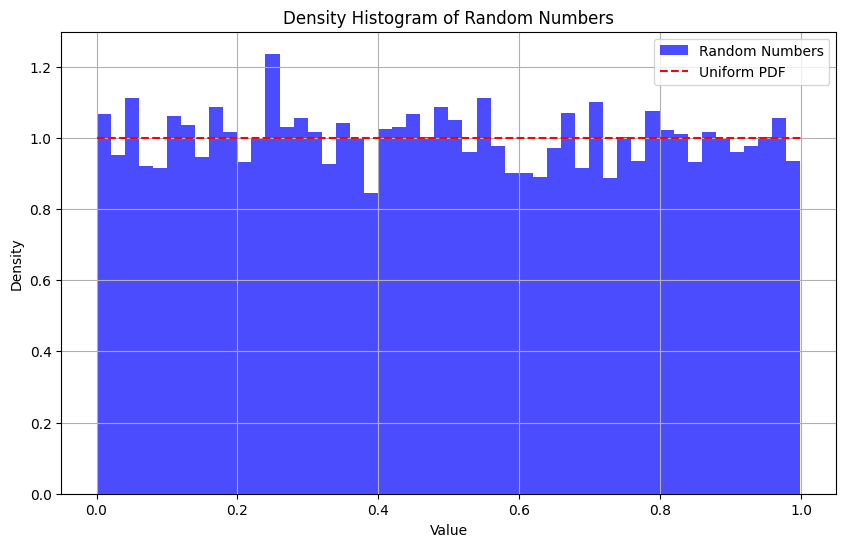

In [22]:
# Generating 10,000 random numbers using np.random.rand()
random_numbers = np.random.rand(10000)

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(random_numbers, bins=50, density=True, alpha=0.7, color='blue', label='Random Numbers')

# Plotting uniform PDF
x = np.linspace(0, 1, 1000)
plt.plot(x, np.ones_like(x), color='red', linestyle='--', label='Uniform PDF')

plt.title('Density Histogram of Random Numbers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Problem 3

In [23]:
start_time = time.time()

# Custom LCRNG to generate 10,000 random numbers
random_generator = LCRNG(seed=42)
random_numbers = [random_generator.next() for _ in range(10000)]

end_time = time.time()

print("Time taken by custom LCRNG:", end_time - start_time, "seconds")

start_time = time.time()

# Generating 10,000 random numbers using np.random.rand()
random_numbers = np.random.rand(10000)

end_time = time.time()

print("Time taken by np.random.rand():", end_time - start_time, "seconds")

Time taken by custom LCRNG: 0.007152080535888672 seconds
Time taken by np.random.rand(): 0.0005960464477539062 seconds


# Problem 4

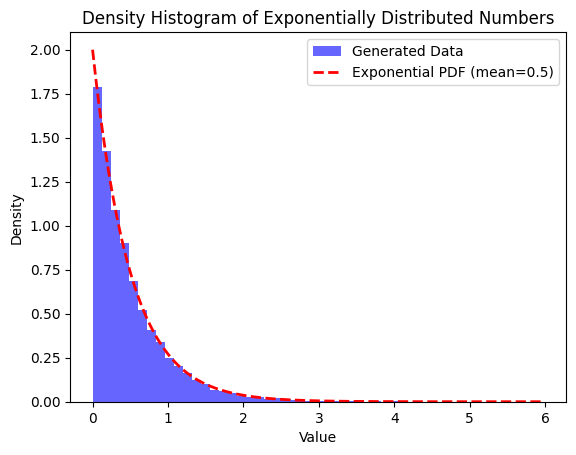

In [25]:
# Read the numbers from the file
numbers = np.loadtxt('exponential_numbers.txt')

# Create a density histogram
plt.hist(numbers, bins=50, density=True, alpha=0.6, color='blue', label='Generated Data')

# Plot the exponential PDF
mean = 0.5
x = np.linspace(0, np.max(numbers), 1000)
pdf = (1/mean) * np.exp(-x/mean)
plt.plot(x, pdf, 'r--', lw=2, label='Exponential PDF (mean=0.5)')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Histogram of Exponentially Distributed Numbers')
plt.legend()
plt.show()

# Problem 5

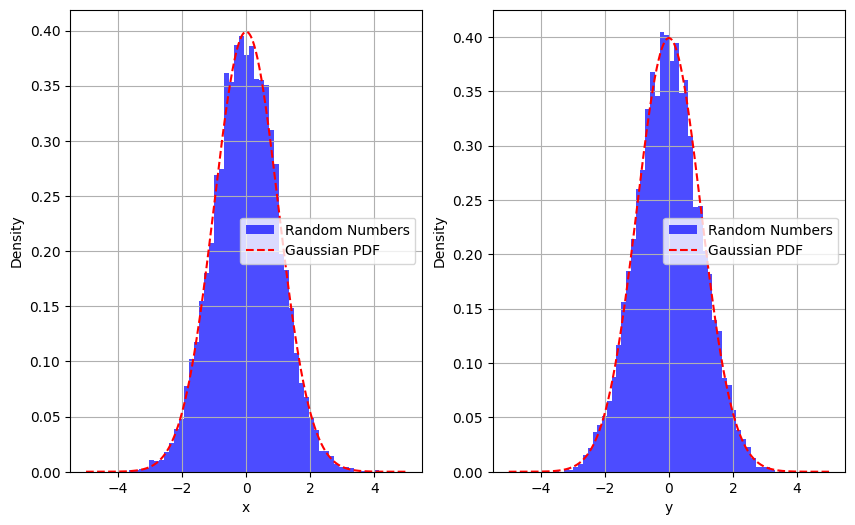

In [26]:
# Box-Muller method to generate random numbers with Gaussian distribution
def box_muller(n):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z1, z2

# Generating 10,000 random numbers with Gaussian distribution using Box-Muller method
random_x, random_y = box_muller(10000)

# Plotting histogram
x = np.linspace(-5, 5, 1000)
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)
fig,(px,py) = plt.subplots(1,2,figsize=(10, 6))

px.hist(random_x, bins=50, density=True, alpha=0.7, color='blue', label='Random Numbers')
px.plot(x, pdf, color='red', linestyle='--', label='Gaussian PDF')
px.set_xlabel('x')
px.set_ylabel('Density')
px.legend()
px.grid(True)

py.hist(random_y, bins=50, density=True, alpha=0.7, color='blue', label='Random Numbers')
py.plot(x, pdf, color='red', linestyle='--', label='Gaussian PDF')
py.set_xlabel('y')
py.set_ylabel('Density')
py.legend()
py.grid(True)

# Problem 6

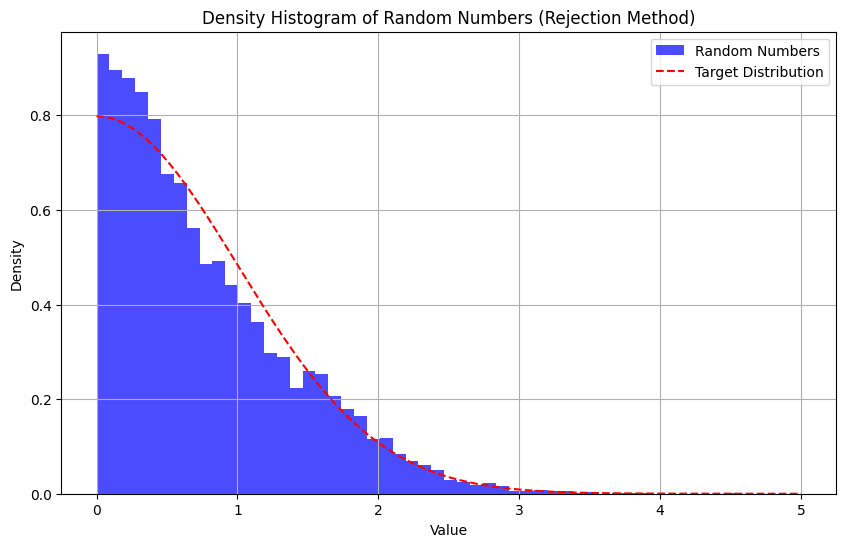

In [27]:
# Define the target distribution function
def target_distribution(x):
    return (np.sqrt(2/np.pi) * np.exp(-(x**2)/2))

# Define the envelope function (a constant times a function that majorizes the target distribution)
def envelope_function(x):
    return c * np.exp(-x)

# Parameters
c = 1  # Constant for the envelope function (chosen to majorize the target distribution)

# Rejection method to generate random numbers according to the target distribution
def rejection_method(n):
    samples = []
    while len(samples) < n:
        x = np.random.exponential(1)  # Sample x from the exponential distribution
        u = np.random.rand()          # Sample a uniform random number u

        if u * c * np.exp(-x) <= target_distribution(x):
            samples.append(x)
    return samples

# Generating random numbers using rejection method
random_numbers = rejection_method(10000)

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(random_numbers, bins=50, density=True, alpha=0.7, color='blue', label='Random Numbers')

# Plotting the target distribution
x_values = np.linspace(0, 5, 1000)
plt.plot(x_values, target_distribution(x_values), color='red', linestyle='--', label='Target Distribution')

plt.title('Density Histogram of Random Numbers (Rejection Method)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Problem 7

In [28]:
s = np.arange(2,13,1)
ndf = len(s)
o1 = np.array([4, 10, 10, 13, 20, 18, 18, 11, 13, 14, 13])
o2 = np.array([3, 7, 11, 15, 19, 24, 21, 17, 13, 9, 5])
p = np.array([1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36])

n1 = np.sum(o1)
n2 = np.sum(o2)

v1 = np.sum(((o1-(n1*p))**2)/(n1*p))
v2 = np.sum(((o2-(n2*p))**2)/(n2*p))

t1 = 1.0 - scipy.stats.chi2.cdf(v1, ndf)
t2 = 1.0 - scipy.stats.chi2.cdf(v2, ndf)

if t1 < 0.01 or t1 > 0.99:
  print("Numbers are not sufficiently random in simulation 1")
elif 0.01 <= t1 < 0.05 or 0.95 < t1 <= 0.99:
  print("Numbers are suspect in simulation 1")
elif 0.05 <= t1 < 0.1 or 0.90 < t1 <= 0.95:
  print("Numbers are almost suspect in simulation 1")
else:
  print("Numbers are sufficiently random in simulation 1")

if t2 < 0.01 or t2 > 0.99:
  print("Numbers are not sufficiently random in simulation 2")
elif 0.01 <= t2 < 0.05 or 0.95 < t2 <= 0.99:
  print("Numbers are suspect in simulation 2")
elif 0.05 <= t2 < 0.1 or 0.90 < t2 <= 0.95:
  print("Numbers are almost suspect in simulation 2")
else:
  print("Numbers are sufficiently random in simulation 2")

Numbers are not sufficiently random in simulation 1
Numbers are not sufficiently random in simulation 2


# Problem 8


In [29]:
def monte_carlo_circle_area(num_samples):
  inside_circle = 0
  for _ in range(num_samples):
    x, y = np.random.uniform(-1, 1, 2)
    if x**2 + y**2 <= 1:
      inside_circle += 1
  area = (inside_circle / num_samples) * 4 # The area of the square is 4
  return area

num_samples = 100000
circle_area = monte_carlo_circle_area(num_samples)
print(f"Estimated area of the unit circle: {circle_area}")

Estimated area of the unit circle: 3.14236


In [30]:
def monte_carlo_sphere_volume(num_samples, dimensions):
  inside_sphere = 0
  for _ in range(num_samples):
    point = np.random.uniform(-1, 1, dimensions)
    if np.sum(point**2) <= 1:
      inside_sphere += 1
  volume = (inside_sphere / num_samples) * (2**dimensions) # The volume of the hypercube is 2^dimensions
  return volume

dimensions = 10
num_samples = 1000000
sphere_volume = monte_carlo_sphere_volume(num_samples, dimensions)
print(f"Estimated volume of the {dimensions}-dimensional unit sphere: {sphere_volume}")

Estimated volume of the 10-dimensional unit sphere: 2.499584


# Problem 9

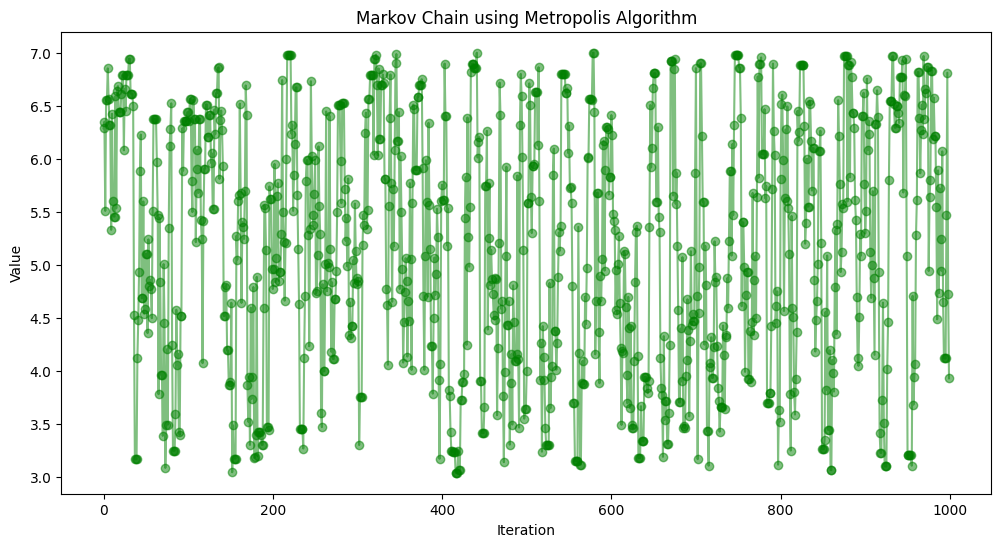

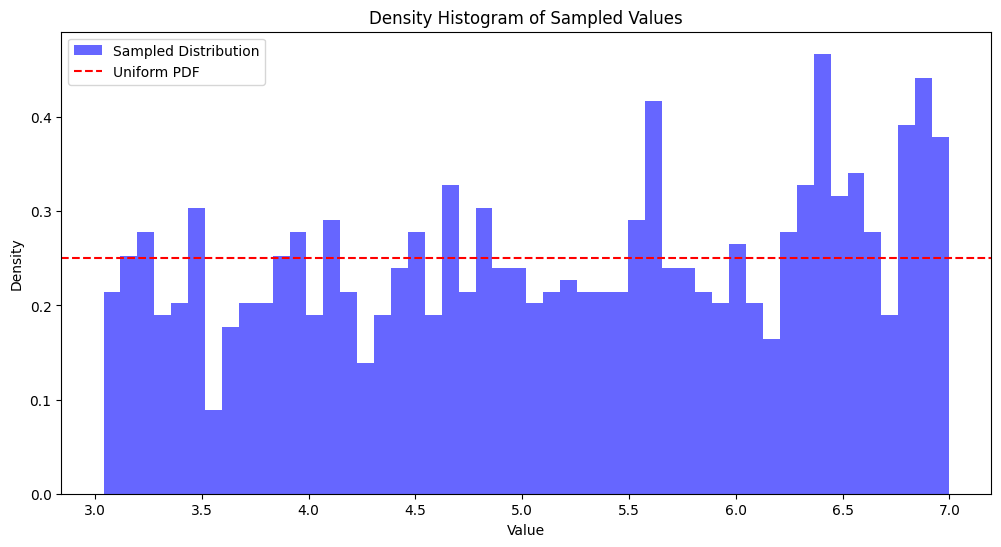

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def metropolis_sampler(num_samples, proposal_std, start_value, lower_bound, upper_bound):
    samples = []
    current_value = start_value

    for _ in range(num_samples):
        proposed_value = current_value + np.random.normal(0, proposal_std)

        # Acceptance probability
        if lower_bound <= proposed_value <= upper_bound:
            current_value = proposed_value

        samples.append(current_value)

    return samples

# Parameters
num_samples = 1000
proposal_std = 1.0
start_value = 5.0
lower_bound = 3.0
upper_bound = 7.0

# Generate samples
samples = metropolis_sampler(num_samples, proposal_std, start_value, lower_bound, upper_bound)

# Plot the Markov Chain
plt.figure(figsize=(12, 6))
plt.plot(samples, marker='o', color='g',linestyle='-', alpha=0.5)
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Markov Chain using Metropolis Algorithm')
plt.show()

# Plot the density histogram and compare it to the uniform distribution
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='blue', label='Sampled Distribution')
plt.axhline(1/(upper_bound - lower_bound), color='r', linestyle='--', label='Uniform PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Histogram of Sampled Values')
plt.legend()
plt.show()

# Problem 10

In [32]:
data = np.array([[201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146], [592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344], [61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22]])

# Model function
def model(x, params):
    a, b, c = params
    return a * x ** 2 + b * x + c

# Likelihood function
def ln_likelihood(params, x, y, yerr):
    model_values = model(x, params)
    residuals = y - model_values
    return -0.5 * np.sum((residuals / yerr) ** 2 + np.log(2 * np.pi * (yerr ** 2)))

# Priors
def ln_prior(params):
    return 0

# Posterior
def ln_posterior(params, x, y, yerr):
    prior = ln_prior(params)
    if not np.isfinite(prior):
        return -np.inf
    likelihood = ln_likelihood(params, x, y, yerr)
    return prior + likelihood

# MCMC
ndim = 3
nwalkers = 50
nsteps = 4000

# Initialization
initial_params = np.array([1.0, 1.0, 1.0])
nll = lambda *args: -ln_likelihood(*args)
s = minimize(nll,initial_params,args=(data[0], data[1], data[2]))
p0 = s.x + 1e-4 * np.random.randn(nwalkers, ndim)

# MCMC sampling
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(data[0], data[1], data[2]));
sampler.run_mcmc(p0, nsteps, progress=True);


100%|██████████| 4000/4000 [00:13<00:00, 296.04it/s]


Text(0.5, 0, 'step number')

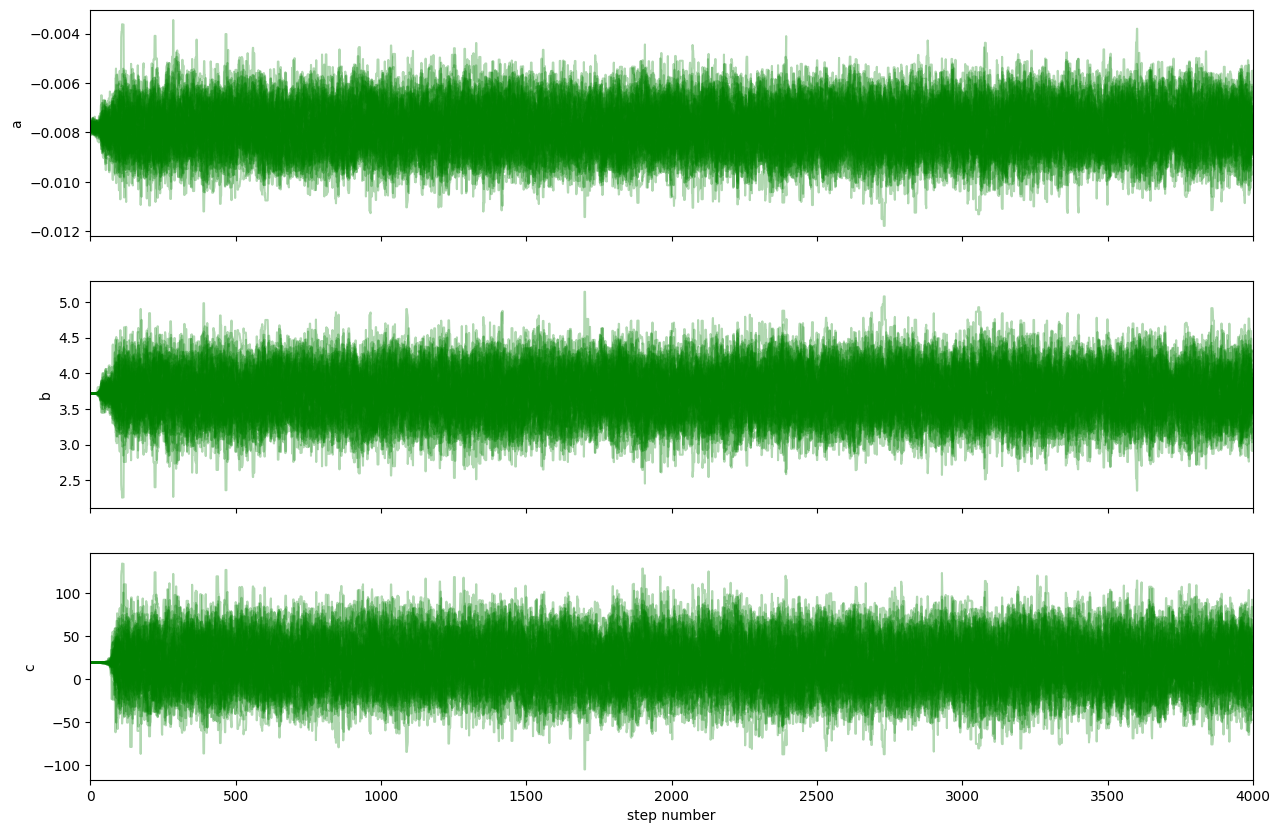

In [33]:
# Plotting the chains and posterior distributions
samples = sampler.get_chain()
fig, axes = plt.subplots(ndim, figsize=(15, 10), sharex=True)
labels = ['a', 'b', 'c']
for i in range(ndim):
    axes[i].plot(samples[:,:,i], alpha=0.3,color='g')
    axes[i].set_xlim(0,len(samples))
    axes[i].set_ylabel(labels[i])
axes[-1].set_xlabel("step number")

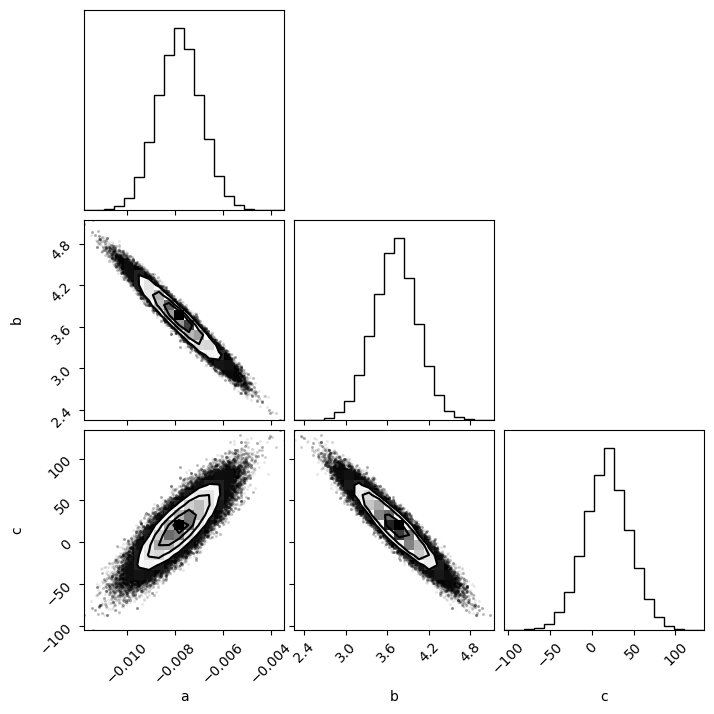

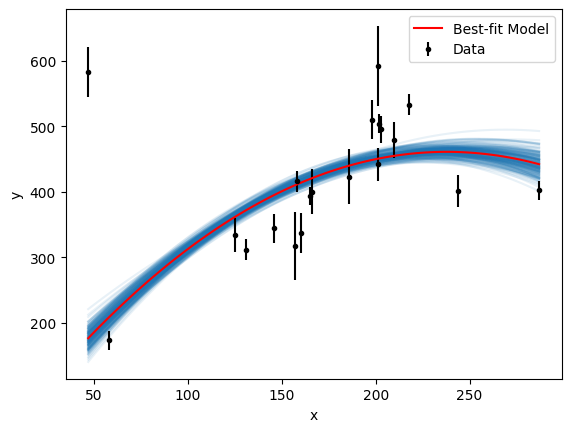

The median values of
a: -0.008,  b:  3.717, c: 18.716
The one sigma uncertainties of
a:(- 0.001,+ 0.001), b:(- 0.314,+ 0.313), c:(- 26.515,+ 26.245)


In [34]:
# Plotting the corner plot
samples = sampler.chain[:, :, :].reshape((-1, ndim))
a_median, b_median, c_median = np.median(samples, axis=0)
a_sigma, b_sigma, c_sigma = np.std(samples, axis=0)
figure = corner.corner(samples, labels=labels)
plt.figure()
x_values = np.linspace(min(data[0]), max(data[0]), 100)
for params in samples[np.random.randint(len(samples), size=200)]:
    plt.plot(x_values, model(x_values, params), color="C0", alpha=0.1)
plt.errorbar(data[0], data[1], yerr=data[2], fmt=".k", capsize=0, label="Data")
plt.plot(x_values, model(x_values, [a_median, b_median, c_median]), color="red", label="Best-fit Model")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

per = np.percentile(samples,[16,50,84],axis=0)
a_error_min,a_error_max = np.diff(per[:,0])
b_error_min,b_error_max = np.diff(per[:,1])
c_error_min,c_error_max = np.diff(per[:,2])

print("The median values of")
print(f"a: {a_median: .3f},  b: {b_median: .3f}, c:{c_median: .3f}")
print("The one sigma uncertainties of")
print(f"a:(-{a_error_min: .3f},+{a_error_max: .3f}), b:(-{b_error_min: .3f},+{b_error_max: .3f}), c:(-{c_error_min: .3f},+{c_error_max: .3f})")